In [1]:
import os
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import tensorflow as tf; 
print(tf.version)

<module 'tensorflow_core._api.v2.version' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow_core\\_api\\v2\\version\\__init__.py'>


In [2]:
%matplotlib inline

def read_image(filePath):
    image = Image.open(filePath)

    # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.resize
    image = image.resize((28, 28), Image.LANCZOS)

    # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.convert
    image = image.convert("L")

    image = np.asarray(image)

    return np.asarray(image).astype(np.float32) / 255.

def read_images(path):
    files = os.listdir(path)    
    files = [file for file in files if file[-4:] == ".png"]
    random.shuffle(files)
    images = []
    for file in files:
        try:
            images.append(read_image(os.path.join(path, file)))
        except OSError:
            pass
    
    return images

test_samples_per_digit = 1
x_train_arr = []
y_train_arr = []
x_test_arr = []
y_test_arr = []
for i in range(10):
    images = read_images("images/digits/" + str(i))
    print("Digit: " + str(i) + "; Images: " + str(len(images)))
    #plt.imshow(images[0])
    #plt.show()
    idx = 0
    for image in images:
        if idx < test_samples_per_digit:
            x_test_arr.append(image)
            y_test_arr.append(i)  
        else:
            x_train_arr.append(image)
            y_train_arr.append(i)
        idx = idx + 1
    
# convert to numpy types
x_train = np.asarray(x_train_arr)#.astype(np.float32) / 255.
y_train = to_categorical(y_train_arr)
x_test = np.asarray(x_test_arr)#.astype(np.float32) / 255.
y_test = to_categorical(y_test_arr)
print("x_train: " + str(x_train))
print("y_train: " + str(y_train))
print("##########################")
print("x_test: " + str(x_test))
print("y_test: " + str(y_test))

Digit: 0; Images: 155
Digit: 1; Images: 127
Digit: 2; Images: 118
Digit: 3; Images: 72
Digit: 4; Images: 73
Digit: 5; Images: 81
Digit: 6; Images: 84
Digit: 7; Images: 61
Digit: 8; Images: 42
Digit: 9; Images: 71
x_train: [[[0.79607844 0.79607844 0.7921569  ... 0.85490197 0.8509804  0.8509804 ]
  [0.80784315 0.8235294  0.84313726 ... 0.84705883 0.84313726 0.84313726]
  [0.78431374 0.79607844 0.8156863  ... 0.8392157  0.8392157  0.8392157 ]
  ...
  [0.8392157  0.85490197 0.87058824 ... 0.89411765 0.8156863  0.77254903]
  [0.8235294  0.827451   0.84705883 ... 0.9098039  0.8156863  0.7490196 ]
  [0.81960785 0.8156863  0.8235294  ... 0.9137255  0.8        0.7176471 ]]

 [[0.84313726 0.84313726 0.84313726 ... 0.84313726 0.8392157  0.84313726]
  [0.8392157  0.84313726 0.8392157  ... 0.84705883 0.84313726 0.8392157 ]
  [0.8392157  0.8392157  0.8352941  ... 0.8509804  0.84313726 0.8392157 ]
  ...
  [0.84705883 0.7882353  0.6901961  ... 0.83137256 0.84705883 0.84313726]
  [0.8392157  0.8235294 

In [3]:
def createModel(width, height):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (width, height, 1)))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax'))

    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc"])
    return model

In [4]:
model = createModel(x_train.shape[1], x_train.shape[2])

model.fit(
    x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1),
    y_train,
    epochs=200,
    batch_size=128)

Train on 874 samples
Epoch 1/200
874/874 [==============================] - 2s 3ms/sample - loss: 2.2846 - acc: 0.1453
Epoch 2/200
874/874 [==============================] - 0s 286us/sample - loss: 2.2603 - acc: 0.1465
Epoch 3/200
874/874 [==============================] - 0s 365us/sample - loss: 2.2534 - acc: 0.1693
Epoch 4/200
874/874 [==============================] - 0s 237us/sample - loss: 2.2516 - acc: 0.1693
Epoch 5/200
874/874 [==============================] - 0s 319us/sample - loss: 2.2388 - acc: 0.1705
Epoch 6/200
874/874 [==============================] - 0s 114us/sample - loss: 2.2492 - acc: 0.1796
Epoch 7/200
874/874 [==============================] - 0s 230us/sample - loss: 2.2338 - acc: 0.1773
Epoch 8/200
874/874 [==============================] - 0s 231us/sample - loss: 2.2237 - acc: 0.1739
Epoch 9/200
874/874 [==============================] - 0s 238us/sample - loss: 2.2224 - acc: 0.1934
Epoch 10/200
874/874 [==============================] - 0s 349us/sample - loss: 2

874/874 [==============================] - 0s 338us/sample - loss: 0.3226 - acc: 0.8879
Epoch 83/200
874/874 [==============================] - 0s 46us/sample - loss: 0.2867 - acc: 0.9142
Epoch 84/200
874/874 [==============================] - 0s 42us/sample - loss: 0.2272 - acc: 0.9291
Epoch 85/200
874/874 [==============================] - 0s 351us/sample - loss: 0.2324 - acc: 0.9233
Epoch 86/200
874/874 [==============================] - 0s 345us/sample - loss: 0.2425 - acc: 0.9176
Epoch 87/200
874/874 [==============================] - 0s 237us/sample - loss: 0.2651 - acc: 0.9256
Epoch 88/200
874/874 [==============================] - 0s 249us/sample - loss: 0.2245 - acc: 0.9188
Epoch 89/200
874/874 [==============================] - 0s 234us/sample - loss: 0.2668 - acc: 0.9130
Epoch 90/200
874/874 [==============================] - 0s 199us/sample - loss: 0.2493 - acc: 0.9199
Epoch 91/200
874/874 [==============================] - 0s 113us/sample - loss: 0.2114 - acc: 0.9256
Epoch

Epoch 163/200
874/874 [==============================] - 0s 43us/sample - loss: 0.0751 - acc: 0.9725
Epoch 164/200
874/874 [==============================] - 0s 298us/sample - loss: 0.0926 - acc: 0.9714
Epoch 165/200
874/874 [==============================] - 0s 45us/sample - loss: 0.0704 - acc: 0.9771
Epoch 166/200
874/874 [==============================] - 0s 280us/sample - loss: 0.0725 - acc: 0.9737
Epoch 167/200
874/874 [==============================] - 0s 140us/sample - loss: 0.0989 - acc: 0.9657
Epoch 168/200
874/874 [==============================] - 0s 231us/sample - loss: 0.0675 - acc: 0.9817
Epoch 169/200
874/874 [==============================] - 0s 341us/sample - loss: 0.0627 - acc: 0.9840
Epoch 170/200
874/874 [==============================] - 0s 136us/sample - loss: 0.0739 - acc: 0.9794
Epoch 171/200
874/874 [==============================] - 0s 111us/sample - loss: 0.0673 - acc: 0.9760
Epoch 172/200
874/874 [==============================] - 0s 95us/sample - loss: 0.05

correct: True; expcted: 0; predicted: 0; confidence: 1.0
correct: True; expcted: 1; predicted: 1; confidence: 1.0
correct: True; expcted: 2; predicted: 2; confidence: 1.0
correct: True; expcted: 3; predicted: 3; confidence: 0.98
correct: False; expcted: 4; predicted: 0; confidence: 0.95


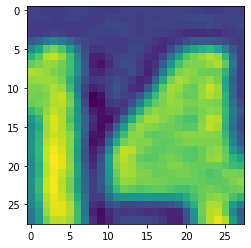

correct: True; expcted: 5; predicted: 5; confidence: 1.0
correct: True; expcted: 6; predicted: 6; confidence: 1.0
correct: True; expcted: 7; predicted: 7; confidence: 1.0
correct: True; expcted: 8; predicted: 8; confidence: 0.73
correct: True; expcted: 9; predicted: 9; confidence: 1.0


In [5]:
def predict(img):
    result = model.predict(img.reshape(1, img.shape[0], img.shape[1], 1))
    pred = np.argmax(result, axis = 1)[0]
    convidence = result[0][pred]
    return (pred, convidence)

def predict_test(idx):
    result = predict(x_test[idx])
    pred = result[0]
    convidence = result[1]
    expect = y_test_arr[idx]
    correct = expect == pred    
    print("correct: " + str(correct) + 
          "; expcted: " + str(expect) + 
          "; predicted: " + str(pred) + 
          "; confidence: " + str(round(convidence, 2)))
    if not correct or convidence < 0.7:
        plt.imshow(x_test[idx])
        plt.show()
for i in range(len(x_test_arr)):
    predict_test(i)

(100%) -> 1


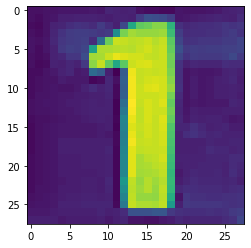

(100%) -> 4


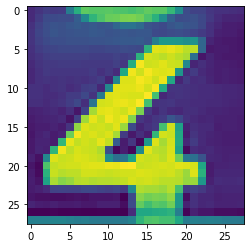

(100%) -> 7


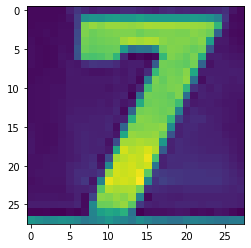

(100%) -> 0


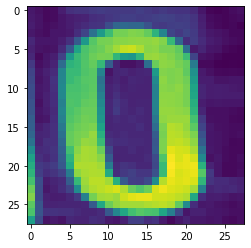

(100%) -> 3


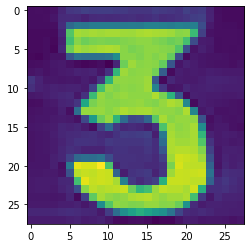

In [12]:
custom_images = read_images("images/meter_digits2")
for img in custom_images:
    result = predict(img)
    print("(" + str(round(result[1] * 100)) + "%) -> " + str(result[0]))
    plt.imshow(img)
    plt.show()

In [11]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("ocr_model.tflite", "wb").write(tflite_model)

526332

In [ ]:
# xxd -i ocr_model.tflite > ocr_model.c